# Day 11-12: Outlier Detection and Removal

## Task:
- Identify and remove outliers from the dataset

## Description: 
- Use statistical methods or visualisation techniques to detect outliers and remove them from the dataset.

## How Outliers are Caused?

Outliers can be caused by a variety of factors, and they often result from genuine variability in the data or from errors in data collection, measurement, or recording. Some common causes of outliers are:

- **Measurement errors**: Errors in data collection or measurement processes can lead to outliers.

- **Sampling errors**: In some cases, outliers can arise due to issues with the sampling process.

- **Natural variability**: Inherent variability in certain phenomena can also lead to outliers. Some systems may exhibit extreme values due to the nature of the process being studied.

- **Data entry errors**: Human errors during data entry can introduce outliers.

- **Experimental errors**: In experimental settings, anomalies may occur due to uncontrolled factors, equipment malfunctions, or unexpected events.

- **Sampling from multiple populations**: Data is inadvertently combined from multiple populations with different characteristics.

- **Intentional outliers**: Outliers are introduced intentionally to test the robustness of statistical methods.

## Non-ML Outlier Detection Methods

**Visualisation**: 

- Box plots: It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. I can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

- Scatter plots: It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

**Z-Score**:
- Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

**IQR (Inter Quartile Range)**:
- IQR approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

## Machine Learning Outlier Detection Methods:
- **Isolation Forest**: An algorithm that isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

- **Local Outlier Factor (LOF)**: A method for detecting outliers based on the local density deviation of a given data point with respect to its neighbors.

- **One-Class SVM**: A support vector machine algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

- **Elliptic Envelope**: A method that fits a robust covariance estimate to the data, and then fits an ellipse to the central data points, which should be less influenced by outliers.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: A density-based clustering algorithm that can be used for outlier detection by identifying points that are in low-density regions.

- **HBOS (Histogram-based Outlier Score)**: A method that divides the feature space into bins and calculates the density in each bin to assign outlier scores.

- **Autoencoder**: An unsupervised neural network architecture that learns to encode input data into a lower-dimensional space and then reconstruct it. Outliers are detected based on reconstruction error.

- **K Nearest Neighbors (KNN)**: By considering the distance of a point to its k nearest neighbors, points that are significantly farther away may be considered outliers.

In [69]:
# Import Libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

## Importing the Dataset

In [70]:
# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


## Visualisation of Outliers (Box Plots)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='bmi'>

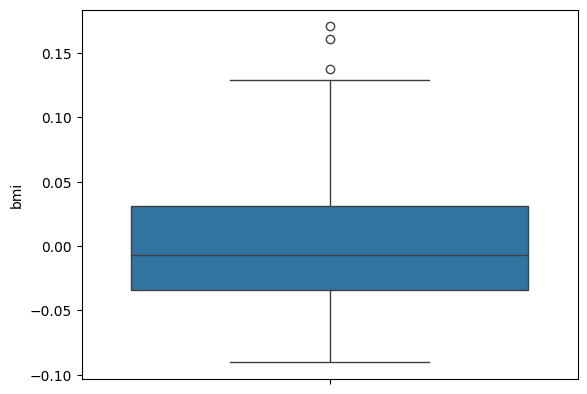

In [71]:
# Box plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

In the above graph, can clearly see that values above 10 are acting as outliers.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


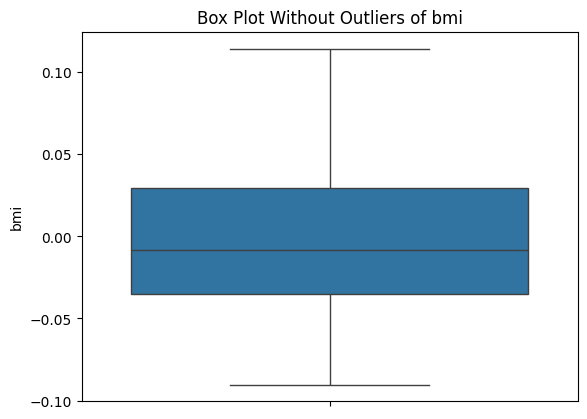

In [72]:
# Create a function to remove outliers
def removal_box_plot(df, column, threshold):
    
    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot Without Outliers of {column}')
    plt.show()
    return removed_outliers

threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

## Z-Score

In [73]:
# Library import
from scipy import stats

# Calculate the z-scores for the 'age' column in the 'df_diabetics' DataFrame and store them in variable 'z'
z = np.abs(stats.zscore(df_diabetics['age']))
# Print the calculated z-scores
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


- We set a threshold value of 2 and then uses NumPy’s np.where() to identify the positions (indices) in the Z-score array z where the absolute Z score is greater than the specified threshold (2). It prints the positions of the outliers in the ‘age’ column based on the Z-score criterion.

In [74]:
# Setting the threshold for identifying outliers as z > 2
threshold_z = 2

# Finding indices of outliers using the threshold
outlier_indices = np.where(z > threshold_z)[0]

# Removing outliers from the DataFrame
no_outliers = df_diabetics.drop(outlier_indices)

# Displaying the shape of the DataFrame before and after removing outliers
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


## IQR (Inter Quartile Range)

In [75]:
# Calculating the Interquartile Range (IQR) for the 'bmi' column
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1

# Printing the calculated IQR
print(IQR)

0.06520763046978838


In [76]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0
